### 1. Vertical Line Test

Create two graphs, one that passes the vertical line test and one that does not.

In [198]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

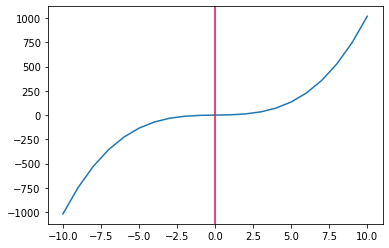

In [56]:
# plot a line that passes the vertical line test
x = np.arange(-10, 11)
y = x**3 + 2*x
plt.plot(x, y)  
plt.axvline(x=0, color='r');

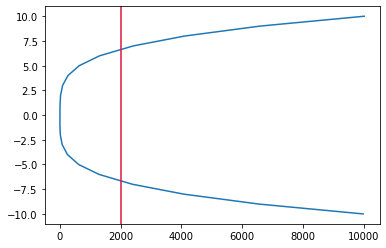

In [58]:
# plot a line that doesn't pass the vertical line test
y = np.arange(-10, 11)
x = y**4 + 2*y
plt.plot(x, y)  
plt.axvline(x=2000, color='r');

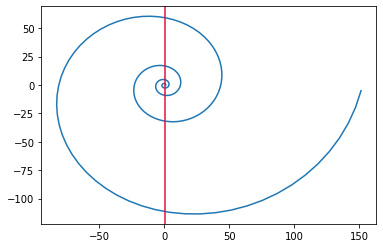

In [62]:
# plot a line that doesn't pass the vertical line test
theta = np.arange(0, 8*np.pi, 0.1)

for c in np.arange(0, 1):
    x = 1*np.cos(theta + c)*np.exp(.2*theta)
    y = 1*np.sin(theta + c)*np.exp(.2*theta)
    p1 = plt.plot(x, y)
plt.axvline(x=.5, color='r');

Why are graphs that don't pass the vertical line test not considered "functions?"

In [ ]:
# A function cannot have the same input 
# (x value/domain value) mapped to multiple outputs
# (y value/co-domain value).

### 2. Functions as Relations

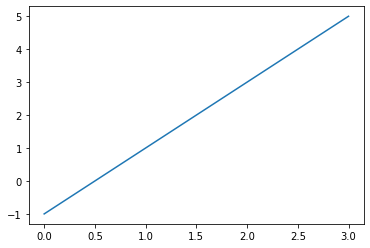

In [100]:
# plot the function f(x) = 2x + 3
x = np.arange(-2, 2)
y = 2*x + 3
plt.plot(y);

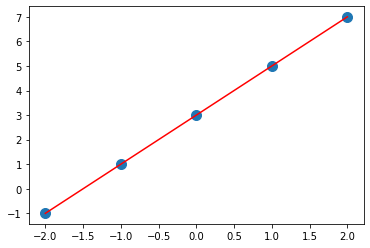

In [87]:
# Plot the following relation:
# (-2, -1), (-1, 1), (0, 3), (1 ,5), (2 ,7)
x = np.array([-2, -1, 0, 1, 2])
y = np.array([-1, 1, 3, 5, 7])
plt.scatter(x, y, s=100)
plt.plot(x, y, color='r');

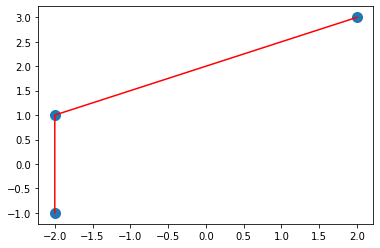

In [86]:
# Relation 1: (-2, -1), (-2, 1), (2, 3)
x = np.array([-2, -2, 2])
y = np.array([-1, 1, 3])
plt.scatter(x, y, s=100)
plt.plot(x,y, color='r');

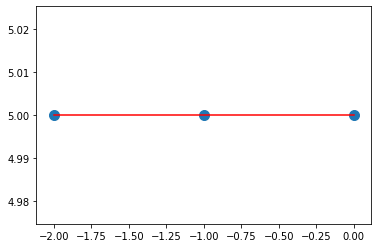

In [89]:
# Relation 2: (-2, 5), (-1, 5), (0, 5)
# no two different y values mapped to same x value!
x = np.array([-2, -1, 0])
y = np.array([5, 5, 5])
plt.scatter(x, y, s=100)
plt.plot(x,y, color='r');

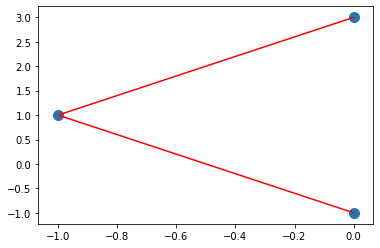

In [90]:
# Relation 3: (0, -1), (-1, 1), (0, 3)
x = np.array([0, -1, 0])
y = np.array([-1, 1, 3])
plt.scatter(x, y, s=100)
plt.plot(x,y, color='r');

### 3. Functions as a mapping between dimensions

[6, 8, 10, 12]


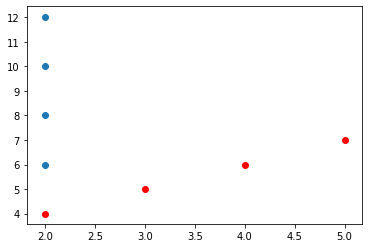

In [175]:
# plot the function g(x1, x2) = x1 + x2

def g(z):
    return z[0] + z[1]
x=[2,2,2,2]
y=[]
for point in [(2,4), (3,5), (4,6), (5,7)]:
    plt.scatter(x=point[0], y=point[1], c='r');
    y.append(g(point))

print(y)
plt.scatter(x, y);

[22, 32, 42] [25, 30, 35]


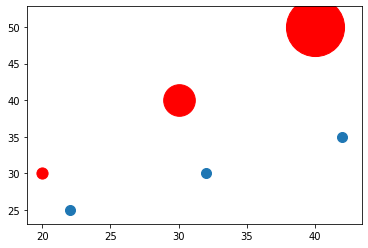

In [185]:
# plot the function h(z1, z2, z3) = (z1 + 2, z2-z3)

def h(z):
    return z[0] + 2, z[1]-z[2]
x=[]
y=[]
for point in [(20,30,5), (30,40,10), (40,50,15)]:
    plt.scatter(x=point[0], 
                y=point[1], 
                s=point[2]**3, 
                c='r');
    x.append(h(point)[0])
    y.append(h(point)[1])

print(x, y)
plt.scatter(x,y, s=100);

### 4. Vector Transformations

In [318]:
# write a function to imitate the lecture notebook:
def f(vect):
    x1=vect[0][0]
    x2=vect[1][0]
    row1 = np.array([2*x1 + x2])
    row2 = np.array([-3*x2 + x1])
    output_vector=np.array([row1, row2])
    return output_vector

In [319]:
# Apply f to x-axis unit vector 
i_hat=np.array([[1],[0]])
a=f(i_hat)
a

array([[2],
       [1]])

In [320]:
# Apply f to y-axis unit vector
j_hat=np.array([[0],[1]])
b=f(j_hat)
b

array([[ 1],
       [-3]])

In [321]:
# Turn those into a matrix 
# (notice this cool np trick for combining column vectors)
T = np.column_stack([a,b])
T

array([[ 2,  1],
       [ 1, -3]])

In [322]:
# Turn those into a dataframe, for comparison
pd.DataFrame(T)

,0,1
0,2,1
1,1,-3


In [323]:
# use the original function again
input_vector=np.array([[3],[4]])
f(input_vector)

array([[10],
       [-9]])

In [324]:
# Now lets do it via matrix multiplication (ie, by hand).
# Do we get the same answer?
output_vector=np.matmul(T, lets_test_it)
output_vector

array([[10],
       [-9]])

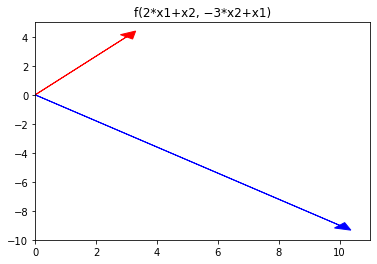

In [339]:
# Display that transformation visually.
plt.arrow(0,0, input_vector[0][0], input_vector[1][0],head_width=.5, head_length=0.5, color ='red')
plt.arrow(0,0, output_vector[0][0], output_vector[1][0],head_width=.5, head_length=0.5, color ='blue')
plt.xlim(0,11)          
plt.ylim(-10,5);
plt.title('f(2*x1+x2, −3*x2+x1)');

In [308]:
# What exactly is the take-away from all of this?
print('We can describe our function f as the product of any vector and T')

We can describe our function f as the product of any vector and T


In [310]:
# Wait. what?
print('We can describe any linear transformation as matrix vector multiplication.')

We can describe any linear transformation as matrix vector multiplication.


### 5. Eigenvalues and Eigenvectors

In [571]:
# Suppose we have a linear transformation (matrix T).
T = np.array([[-1, 3, -1], [-3,5,-1], [-3,3,1]])
T

array([[-1,  3, -1],
       [-3,  5, -1],
       [-3,  3,  1]])

In [576]:
# The numpy 'eig' function returns a tuple of two values.
w, v = np.linalg.eig(T)

In [577]:
# Tuple[0] contains the eigenvalues (one for each column).
print('evalues:')
w

evalues:


array([1., 2., 2.])

In [578]:
#  Tuple[1] contains the corresponding eigenvectors, as columns. 
print('eigenvectors:')
print(v)

eigenvectors:
[[-0.57735027 -0.10893917 -0.52206272]
 [-0.57735027  0.21459692 -0.68943695]
 [-0.57735027  0.97060827 -0.50212269]]


In [579]:
# To get the first eigenvector and its eigenvalue:
evector_0 = v[:,0]
evalue_0=w[0]
print(evector_0)
print(evalue_0)

[-0.57735027 -0.57735027 -0.57735027]
1.0000000000000022


In [580]:
# Dot product of matrix and first eigenvector:
np.dot(T, evector_0)

array([-0.57735027, -0.57735027, -0.57735027])

In [581]:
# Same as multiplying first eigenvalue and eigenvector:
evalue_0*evector_0

array([-0.57735027, -0.57735027, -0.57735027])

In [586]:
# Create a new matrix, with the eigenvalaues on the diagonal.
D=np.diag(w)
D

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [599]:
# Why is this important?
print('Eigenvalues and eigenvectors can be used to decompose any square matrix by diagonalizing it.')

Eigenvalues and eigenvectors can be used to decompose any square matrix by diagonalizing it.


In [613]:
# Okay, do this for any matrix.
P = np.random.randint(1,5,(3,3))
w, v = np.linalg.eig(P)
D=np.diag(w)
print(P)
print(D)

[[3 4 3]
 [2 4 3]
 [3 2 1]]
[[ 8.44558093  0.          0.        ]
 [ 0.          0.31241588  0.        ]
 [ 0.          0.         -0.7579968 ]]


More info [here](https://www.math.ubc.ca/~pwalls/math-python/linear-algebra/eigenvalues-eigenvectors) about how to use eigenvalues to diagonalize a matrix.

### 6. The Curse of Dimensionality

6.1 What are some of the challenges of working with high dimensional spaces?

6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

### 7. Principal Component Analysis

7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [617]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head(3)

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,...,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,...,'1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,...,'3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,...,'2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'


In [618]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes[:10]

CONTROL    object
AGE1        int64
METRO3     object
REGION     object
LMED        int64
FMR         int64
L30         int64
L50         int64
L80         int64
IPOV        int64
dtype: object

In [620]:
# check for null values
national.isnull().sum().any()

False

In [621]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [622]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes[:10]

CONTROL    category
AGE1          int64
METRO3     category
REGION     category
LMED          int64
FMR           int64
L30           int64
L50           int64
L80           int64
IPOV          int64
dtype: object

In [623]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
    national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,...,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,0,82,2,0,73738,956,15738,26213,40322,11067,...,1,1,1,1,1,2,0,2,0,0
1,1,50,4,2,55846,1100,17165,28604,45744,24218,...,3,3,3,5,3,7,0,1,0,0
2,2,53,4,2,55846,1100,13750,22897,36614,15470,...,2,3,4,5,3,4,0,3,0,0
3,3,67,4,2,55846,949,13750,22897,36614,13964,...,2,5,6,6,4,4,0,1,0,0
4,4,26,0,2,60991,737,14801,24628,39421,15492,...,3,2,2,2,2,7,1,1,0,0


In [624]:
# Now we only ahve numeric columns (ints and floats)
national_processed.dtypes[:10]

CONTROL    int32
AGE1       int64
METRO3      int8
REGION      int8
LMED       int64
FMR        int64
L30        int64
L50        int64
L80        int64
IPOV       int64
dtype: object

**Task:** Perform PCA on the processed dataset national_processed (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2.

In [625]:
### Your Code Here

In [626]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [627]:
# There isn't a super clear Y varaible in this dataset, so we'll just 
# pretend that our whole dataset is our X matrix for now.

# Make a copy to save our work at this checkpoint
df = national_processed.copy()
# Turn our dataframe into a numpy array
X = df.values
# instantiate our standard scaler object
scaler = StandardScaler()
# Standardize our data
Z = scaler.fit_transform(X)

In [628]:
# Instantiate our PCA object
pca = PCA(2)
transformed_data = pca.fit_transform(Z)

In [629]:
transformed_data

array([[-2.57657018, -1.37612732],
       [ 2.04064284, -0.98806145],
       [ 1.21527025,  0.37016815],
       ...,
       [ 1.83162816, -2.95570214],
       [-5.02514474, -2.52857813],
       [-9.89816404, -0.80284266]])

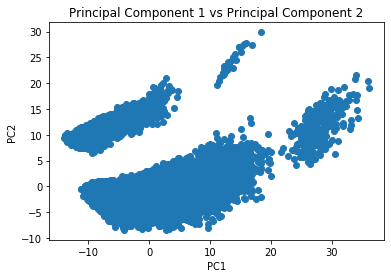

In [630]:
plt.scatter(transformed_data[:,0], transformed_data[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Principal Component 1 vs Principal Component 2")
plt.show()